# Final Project Submission

Please fill out:
* Student name: Pengju Sun
* Student pace: Full time
* Scheduled project review date/time: Thu Dec 10, 2020 10am – 10:45am Eastern Time - New York
* Instructor name: Abhineet.Kulkarni
* Blog post URL:https://pjsun2012.medium.com/sql-joins-a-beginner-study-guide-to-data-analysis-using-sql-95cc2ebb5cfc


# Project Overview
 Use exploratory data analysis to generate insights for a business stakeholder.

# Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun.
They have decided to create a new movie studio, but they don’t know anything about creating movies.
You are charged with exploring what types of films are currently doing the best at the box office.
You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

# The Data
The datasets from:
-	IMDb.title.basics
-	Bom.movie.gross
-	Tn.moive.Budgets
-   Tmdb.movies

# Import Necessary Packeages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Dataset

In [2]:
from glob import glob 
#The glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell, 
#although results are returned in arbitrary order.

In [3]:
csv_files = glob("zippedData/*.csv.gz")

In [4]:
csv_files

['zippedData\\bom.movie_gross.csv.gz',
 'zippedData\\imdb.name.basics.csv.gz',
 'zippedData\\imdb.title.akas.csv.gz',
 'zippedData\\imdb.title.basics.csv.gz',
 'zippedData\\imdb.title.crew.csv.gz',
 'zippedData\\imdb.title.principals.csv.gz',
 'zippedData\\imdb.title.ratings.csv.gz',
 'zippedData\\tmdb.movies.csv.gz',
 'zippedData\\tn.movie_budgets.csv.gz']

In [5]:
import os
#This module provides a portable way of using operating system dependent functionality.

In [6]:
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_")
    filename_df = pd.read_csv(filename, index_col = 0)
    csv_files_dict[filename_cleaned] = filename_df

# Qustion1: How is the whole movie industry?

### 1. Year Trend of Movie Production

In [7]:
df_basics = csv_files_dict['imdb_title_basics_gz']

In [8]:
df_basics.info()
#For the columns data that I need, 'primary_title' and 'start_year', there is no missing data.

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


In [9]:
df_movies_years= df_basics.groupby('start_year').count()

In [10]:
df_movies_years.reset_index(inplace = True)

In [11]:
df_movies_years

,start_year,primary_title,original_title,runtime_minutes,genres
0,2010,11849,11849,9986,11452
1,2011,12900,12900,10707,12432
2,2012,13787,13786,11405,13356
3,2013,14709,14708,12308,14298
4,2014,15589,15589,12964,15095
5,2015,16243,16242,13252,15569
6,2016,17272,17269,13514,16353
7,2017,17504,17494,13466,16816
8,2018,16849,16846,12213,16293
9,2019,8379,8378,4501,8058


In [12]:
#Change column names
df_movies_years.rename(columns = {'start_year': 'Year', 'primary_title': 'num_movies'} , inplace = True)

In [13]:
df_movies_years.head(10)

,Year,num_movies,original_title,runtime_minutes,genres
0,2010,11849,11849,9986,11452
1,2011,12900,12900,10707,12432
2,2012,13787,13786,11405,13356
3,2013,14709,14708,12308,14298
4,2014,15589,15589,12964,15095
5,2015,16243,16242,13252,15569
6,2016,17272,17269,13514,16353
7,2017,17504,17494,13466,16816
8,2018,16849,16846,12213,16293
9,2019,8379,8378,4501,8058


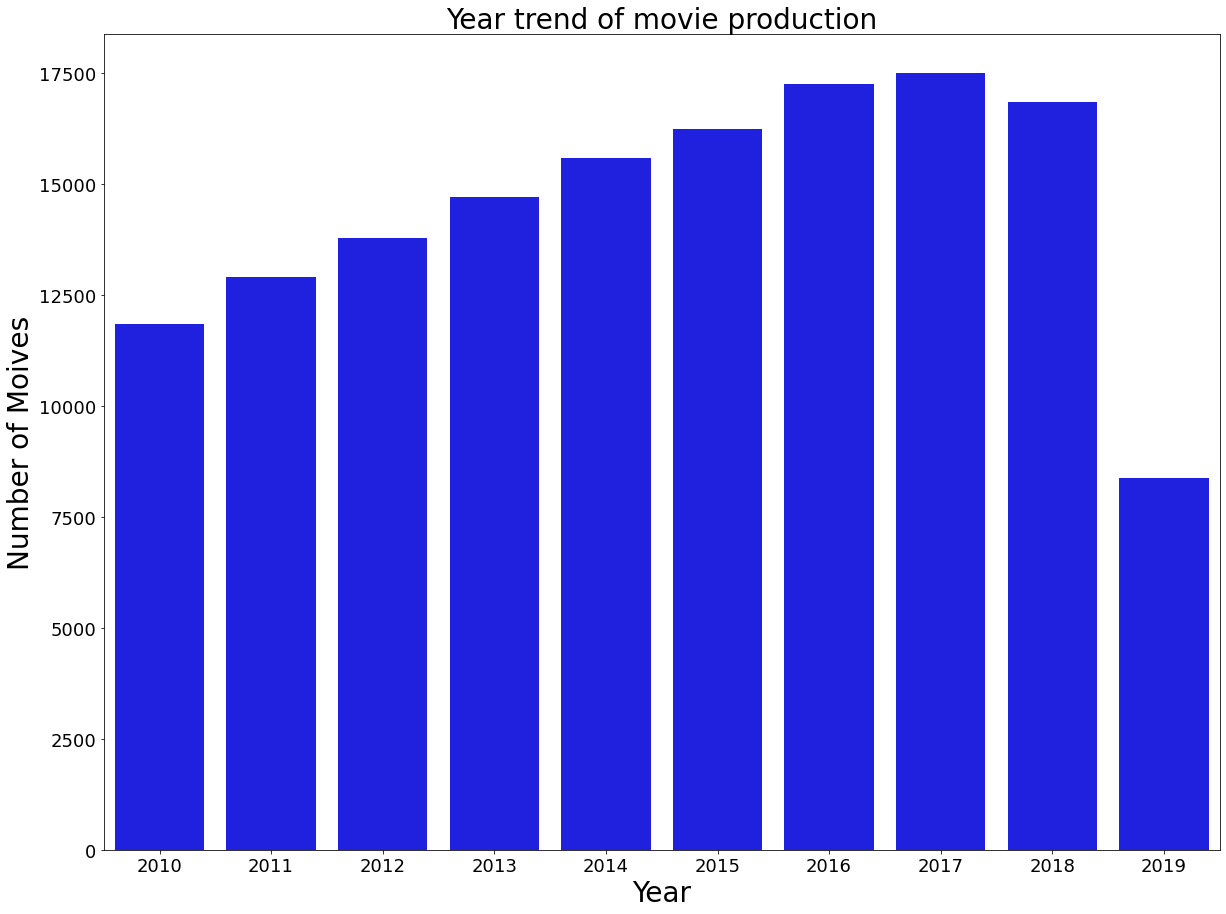

In [14]:
f, ax= plt.subplots(figsize = (20, 15))
sns.barplot(x = 'Year', y = 'num_movies', data = df_movies_years[0:10], color = 'blue')
ax.set_xlabel('Year',fontsize=28)
ax.set_ylabel('Number of Moives',fontsize=28)
ax.tick_params(axis='x',labelsize=18)
ax.tick_params(axis='y',labelsize=18)
plt.title('Year trend of movie production', fontsize=28)
plt.savefig('1')

### 2. Other movie studios gross revenue

In [15]:
df_studio = csv_files_dict['bom_movie_gross_gz']

In [16]:
df_studio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


In [17]:
# figure out the data is from 2010 to 2018
df_studio.groupby('year').count()

,studio,domestic_gross,foreign_gross
year,,,
2010,327,323,314
2011,398,397,293
2012,399,393,250
2013,350,345,205
2014,394,391,238
2015,450,449,191
2016,436,433,195
2017,320,320,178
2018,308,308,173


In [18]:
# Find out missing value
df_studio.isna().sum()/len(df_studio)

studio            0.001476
domestic_gross    0.008267
foreign_gross     0.398583
year              0.000000
dtype: float64

In [19]:
#fill missing vlaues for foreign_gross
df_studio['foreign_gross'] = df_studio['foreign_gross'].fillna(0)

In [20]:
#drop all missing values of stuo and domestic_gross
df_studio_1 = df_studio.dropna()

In [21]:
df_studio_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3356 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3356 non-null   object 
 1   domestic_gross  3356 non-null   float64
 2   foreign_gross   3356 non-null   object 
 3   year            3356 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 131.1+ KB


In [22]:
df_studio_1['foreign_gross'] = df_studio_1['foreign_gross'].str.replace("," , "")
#leanred!!

<ipython-input-22-cfb697f5d0ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_studio_1['foreign_gross'] = df_studio_1['foreign_gross'].str.replace("," , "")


In [23]:
#change foreign_gross data types from object to float
df_studio_1.foreign_gross = df_studio_1.foreign_gross.astype('float64')

C:\Users\pjsun\anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [24]:
df_studio_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3356 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3356 non-null   object 
 1   domestic_gross  3356 non-null   float64
 2   foreign_gross   2007 non-null   float64
 3   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 131.1+ KB


In [25]:
df_studio_1['foreign_gross'] = df_studio_1['foreign_gross'].fillna(0)

<ipython-input-25-c3ccea579927>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_studio_1['foreign_gross'] = df_studio_1['foreign_gross'].fillna(0)


In [26]:
df_studio_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3356 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3356 non-null   object 
 1   domestic_gross  3356 non-null   float64
 2   foreign_gross   3356 non-null   float64
 3   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 131.1+ KB


In [27]:
#creat a new column of total_gross by adding doemstic_gross and foreign_gross
df_studio_1['Total_gross'] = df_studio_1['domestic_gross'] + df_studio_1['foreign_gross']

<ipython-input-27-9be4cac17c88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_studio_1['Total_gross'] = df_studio_1['domestic_gross'] + df_studio_1['foreign_gross']


In [28]:
df_studio_1.head()

,studio,domestic_gross,foreign_gross,year,Total_gross
title,,,,,
Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [29]:
# group by studios and sum all the data for each studio
df_studio_2 = df_studio_1.groupby(['studio']).sum().sort_values(by = 'Total_gross', ascending = False)

In [30]:
# data cleaning, drop the column that I dont need
df_studio_3 = df_studio_2[0:10].drop(columns = ['year'])

In [31]:
#final dataframe, be ready to plot the graph
df_studio_3

,domestic_gross,foreign_gross,Total_gross
studio,,,
BV,1.841903e+10,2.579385e+10,4.421288e+10
Fox,1.094950e+10,2.005587e+10,3.100537e+10
WB,1.216805e+10,1.866790e+10,3.083595e+10
Uni.,1.290239e+10,1.685477e+10,2.975716e+10
Sony,8.459683e+09,1.394524e+10,2.240492e+10
Par.,7.685871e+09,1.186338e+10,1.954926e+10
WB (NL),3.995700e+09,6.339000e+09,1.033470e+10
LGF,4.118963e+09,4.475619e+09,8.594583e+09
LG/S,2.078200e+09,3.353724e+09,5.431924e+09


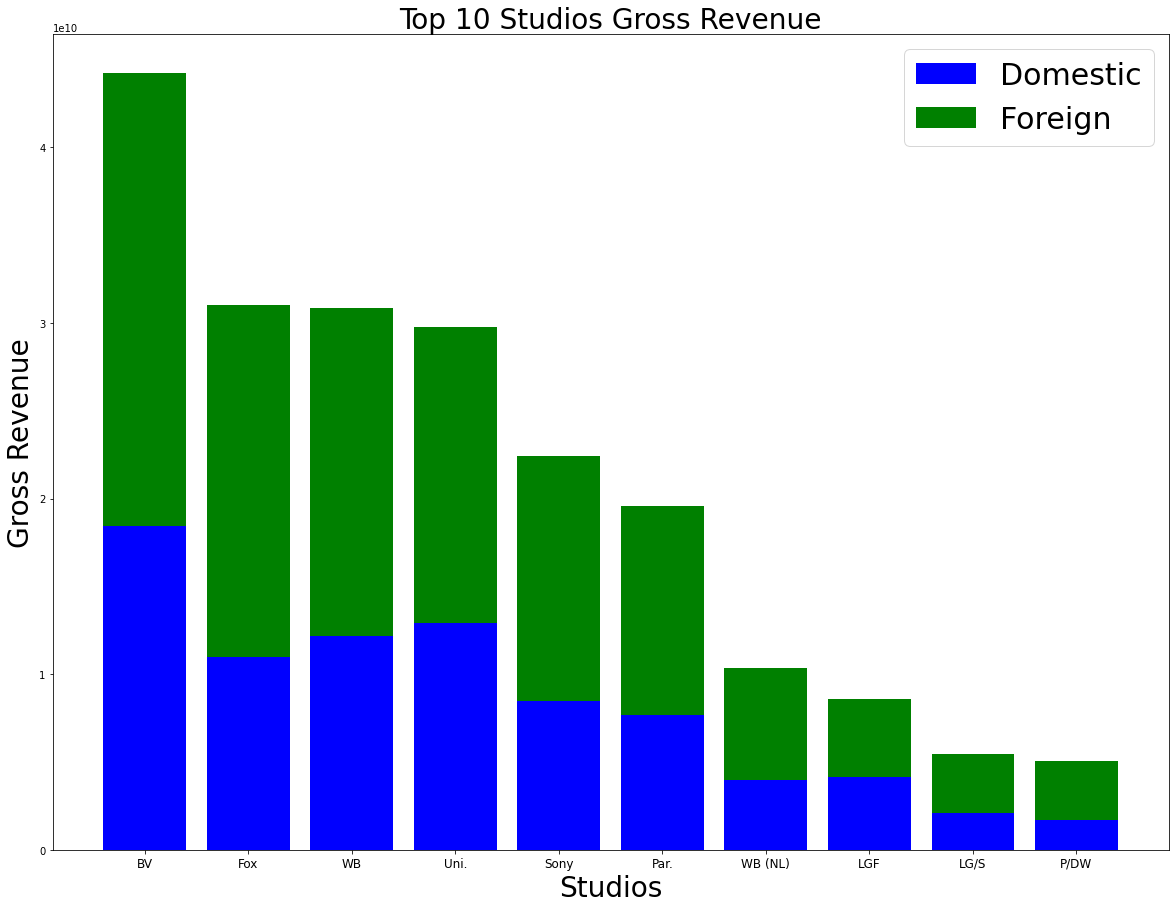

In [32]:
labels = df_studio_3.index
plt.figure(figsize=(20,15))
plt.bar(range(len(labels)), df_studio_3.domestic_gross, color='blue')
plt.bar(range(len(labels)), df_studio_3.foreign_gross, color='green', bottom =  df_studio_3.domestic_gross)
plt.xticks(range(len(labels)), labels, fontsize = 12)
plt.legend(['Domestic', 'Foreign'], fontsize = 30)
plt.title('Top 10 Studios Gross Revenue', fontsize=28)
plt.xlabel('Studios', fontsize=28)
plt.ylabel('Gross Revenue', fontsize=28)
plt.savefig('2')

## Question 2: What are the top 10 most popular movie genres? What is the count of genres by year?

In [33]:
df_basics.head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [34]:
# reset index
df_basics_1 = df_basics.reset_index()

In [35]:
#drop columns which I dont need
data_clean_1 = df_basics_1 .drop(columns = ['runtime_minutes','original_title'])

In [36]:
data_clean_1.head()

,tconst,primary_title,start_year,genres
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"


In [37]:
data_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   tconst         146144 non-null  object
 1   primary_title  146144 non-null  object
 2   start_year     146144 non-null  int64 
 3   genres         140736 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.5+ MB


In [38]:
data_clean_1.isna().sum()/len(data_clean_1)

tconst           0.000000
primary_title    0.000000
start_year       0.000000
genres           0.037005
dtype: float64

In [39]:
#Since the missing data of genres is only 3.7% of entire dataset, dropping rows that contain missing values is a good solution for data cleaning.
data_clean_2 = data_clean_1.dropna()

In [40]:
data_clean_2.isna().sum()

tconst           0
primary_title    0
start_year       0
genres           0
dtype: int64

In [41]:
data_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140736 entries, 0 to 146143
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   tconst         140736 non-null  object
 1   primary_title  140736 non-null  object
 2   start_year     140736 non-null  int64 
 3   genres         140736 non-null  object
dtypes: int64(1), object(3)
memory usage: 5.4+ MB


In [42]:
#another dropping column that I dont need
data_clean_3 = data_clean_2.drop(columns = 'tconst')

In [43]:
#get movie genres column and do data cleaning
movie_genres = data_clean_3['genres']

In [44]:
movie_genres.head()

0      Action,Crime,Drama
1         Biography,Drama
2                   Drama
3            Comedy,Drama
4    Comedy,Drama,Fantasy
Name: genres, dtype: object

In [45]:
# Change Series to list
genres_list = [i for i in movie_genres]

In [46]:
# split ',' for each item in the list
genres_list = [i.split(sep = ',') for i in movie_genres]

In [47]:
# creat a new list 
genres_list_1 = []
for i in genres_list:
    for j in i:
        genres_list_1.append(j)

In [48]:
#change list to array and return the unique values of an array
genres_list_unique = np.unique(genres_list_1)

In [49]:
genres_list_unique

array(['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Game-Show',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show',
       'Thriller', 'War', 'Western'], dtype='<U11')

In [50]:
data_clean_3.shape[0]# total numbers of rows 

140736

In [51]:
genres_list_unique.shape[0]#total number of elements

27

In [52]:
# creat a new 0*0 dataframe. Columns are unique genres list array, index is the  movies name. 
genre_zero = pd.DataFrame(np.zeros((data_clean_3.shape[0], genres_list_unique.shape[0])), columns=genres_list_unique
                          , index=data_clean_3["primary_title"])

In [53]:
genre_zero

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
primary_title,,,,,,,,,,,,,,,,,,,,,
Sunghursh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
One Day Before the Rainy Season,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Other Side of the Wind,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sabse Bada Sukh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Wandering Soap Opera,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Secret of China,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kuambil Lagi Hatiku,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rodolpho Teóphilo - O Legado de um Pioneiro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
len(genres_list)

140736

In [55]:
genres_list[0]

['Action', 'Crime', 'Drama']

In [56]:
genre_zero.columns.get_indexer(genres_list[0])#learned

array([0, 6, 8], dtype=int64)

In [57]:
# Iterating over every item in genres_list and fill values in to column. 
# if the movie belongs to that genre it's value will be 1 otherwise 0
for i  in range(data_clean_3.shape[0]):
    genre_zero.iloc[i, genre_zero.columns.get_indexer(genres_list[i])] = 1
genre_zero

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
primary_title,,,,,,,,,,,,,,,,,,,,,
Sunghursh,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
One Day Before the Rainy Season,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Other Side of the Wind,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sabse Bada Sukh,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Wandering Soap Opera,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Secret of China,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Kuambil Lagi Hatiku,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rodolpho Teóphilo - O Legado de um Pioneiro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
genre_zero.sum().sort_values(ascending = False)

Documentary    51640.0
Drama          49883.0
Comedy         25312.0
Thriller       11883.0
Horror         10805.0
Action         10335.0
Romance         9372.0
Biography       8722.0
Crime           6753.0
Adventure       6465.0
Family          6227.0
History         6225.0
Mystery         4659.0
Music           4314.0
Fantasy         3516.0
Sci-Fi          3365.0
Animation       2799.0
Sport           2234.0
News            1551.0
Musical         1430.0
War             1405.0
Western          467.0
Reality-TV        98.0
Talk-Show         50.0
Adult             25.0
Short             11.0
Game-Show          4.0
dtype: float64

In [59]:
# creat a new datafrome only including moive genres and the sum numbers for each type
a = list(genre_zero.sum().keys())

In [60]:
b = list(genre_zero.sum().values)

In [61]:
d = {'Movie': a, 'Number': b}

In [62]:
aaa = pd.DataFrame(data = d)

In [63]:
aaa_1 = aaa.set_index('Movie')

In [64]:
aaa_2 = aaa_1.sort_values(by = 'Number',ascending = False)

In [65]:
aaa_3 = aaa_2.reset_index()

In [66]:
aaa_3.head(10)

,Movie,Number
0,Documentary,51640.0
1,Drama,49883.0
2,Comedy,25312.0
3,Thriller,11883.0
4,Horror,10805.0
5,Action,10335.0
6,Romance,9372.0
7,Biography,8722.0
8,Crime,6753.0
9,Adventure,6465.0


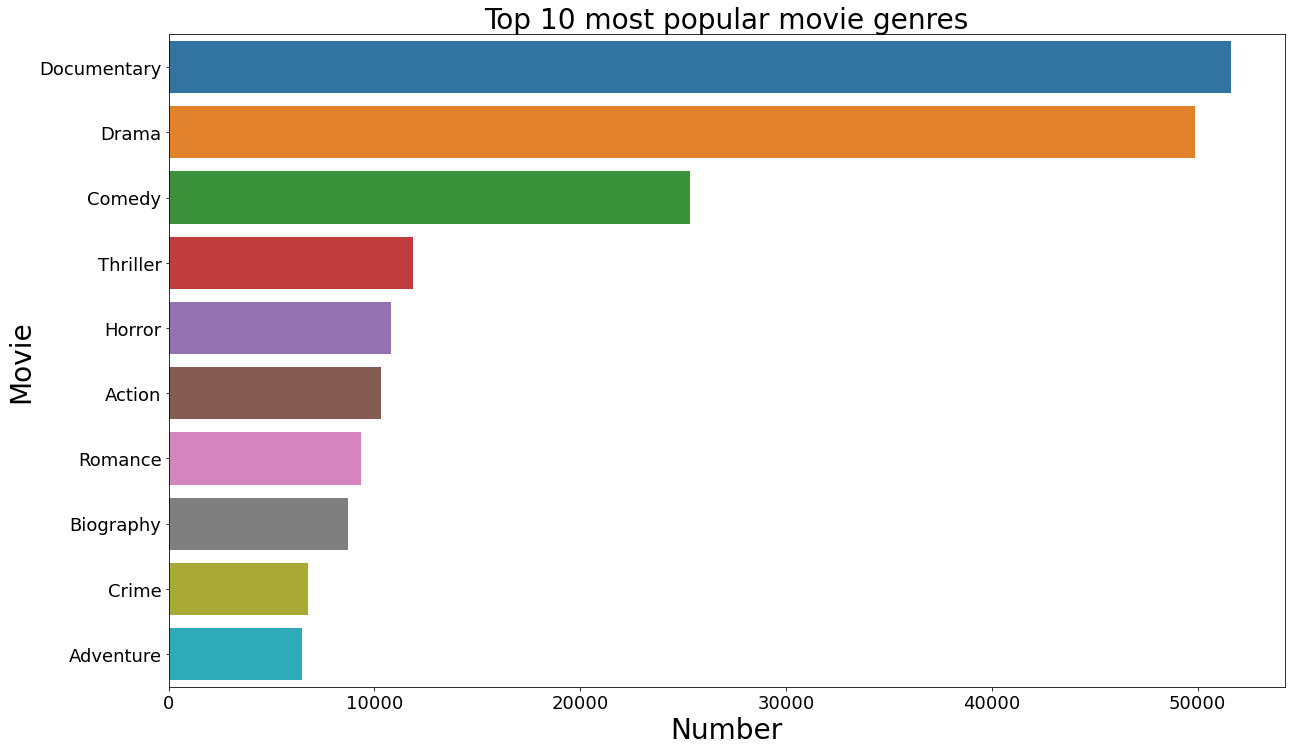

In [67]:
f, ax= plt.subplots(figsize = (20, 12))
sns.barplot(x = 'Number', y = 'Movie', data = aaa_3[:10], ax = ax)
ax.set_xlabel('Number',fontsize=28)
ax.set_ylabel('Movie',fontsize=28)
ax.tick_params(axis='x',labelsize=18)
ax.tick_params(axis='y',labelsize=18)
ax.set_title('Top 10 most popular movie genres',fontsize=28)
plt.savefig('3')

### 2. Count of genres by year

In [68]:
genre_top_10 = genre_zero.drop(columns=['Adult', 'Animation', 'Family', 'Fantasy', 'Game-Show','History', 'Music', 'Musical', 'Mystery', 'News','Reality-TV', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'War', 'Western'])

In [69]:
genre_top_10

,Action,Adventure,Biography,Comedy,Crime,Documentary,Drama,Horror,Romance,Thriller
primary_title,,,,,,,,,,
Sunghursh,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
One Day Before the Rainy Season,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
The Other Side of the Wind,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Sabse Bada Sukh,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
The Wandering Soap Opera,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
The Secret of China,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kuambil Lagi Hatiku,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Rodolpho Teóphilo - O Legado de um Pioneiro,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [70]:
data_clean_4 = data_clean_3.drop(columns = 'genres')

In [71]:
data_clean_4.head()

,primary_title,start_year
0,Sunghursh,2013
1,One Day Before the Rainy Season,2019
2,The Other Side of the Wind,2018
3,Sabse Bada Sukh,2018
4,The Wandering Soap Opera,2017


In [72]:
data_clean_5 = data_clean_4.set_index('primary_title')

In [73]:
data_clean_5

,start_year
primary_title,
Sunghursh,2013
One Day Before the Rainy Season,2019
The Other Side of the Wind,2018
Sabse Bada Sukh,2018
The Wandering Soap Opera,2017
...,...
The Secret of China,2019
Kuambil Lagi Hatiku,2019
Rodolpho Teóphilo - O Legado de um Pioneiro,2015


In [74]:
#merge datafrmes
genres_counts_year = pd.concat([genre_top_10,data_clean_5],axis=1)

In [75]:
genres_counts_year

,Action,Adventure,Biography,Comedy,Crime,Documentary,Drama,Horror,Romance,Thriller,start_year
primary_title,,,,,,,,,,,
Sunghursh,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2013
One Day Before the Rainy Season,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2019
The Other Side of the Wind,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2018
Sabse Bada Sukh,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2018
The Wandering Soap Opera,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2017
...,...,...,...,...,...,...,...,...,...,...,...
The Secret of China,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019
Kuambil Lagi Hatiku,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2019
Rodolpho Teóphilo - O Legado de um Pioneiro,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2015


In [76]:
genres_counts_year_1 = genres_counts_year.groupby('start_year').sum()

In [77]:
genres_counts_year_1

,Action,Adventure,Biography,Comedy,Crime,Documentary,Drama,Horror,Romance,Thriller
start_year,,,,,,,,,,
2010,891.0,502.0,793.0,2179.0,537.0,4393.0,4297.0,774.0,848.0,832.0
2011,912.0,581.0,889.0,2328.0,572.0,4754.0,4526.0,897.0,847.0,909.0
2012,919.0,638.0,1011.0,2484.0,601.0,5221.0,4800.0,981.0,870.0,1016.0
2013,1008.0,792.0,1253.0,2653.0,717.0,5575.0,5356.0,1042.0,1034.0,1245.0
2014,1073.0,795.0,1375.0,2811.0,748.0,5972.0,5478.0,1147.0,1139.0,1318.0
2015,1092.0,714.0,952.0,2748.0,737.0,6028.0,5492.0,1154.0,1082.0,1327.0
2016,1207.0,708.0,818.0,2853.0,860.0,6066.0,5593.0,1285.0,1075.0,1395.0
2017,1257.0,671.0,746.0,2791.0,776.0,6133.0,5615.0,1349.0,975.0,1371.0
2018,1128.0,616.0,590.0,2834.0,730.0,5302.0,5626.0,1330.0,982.0,1486.0


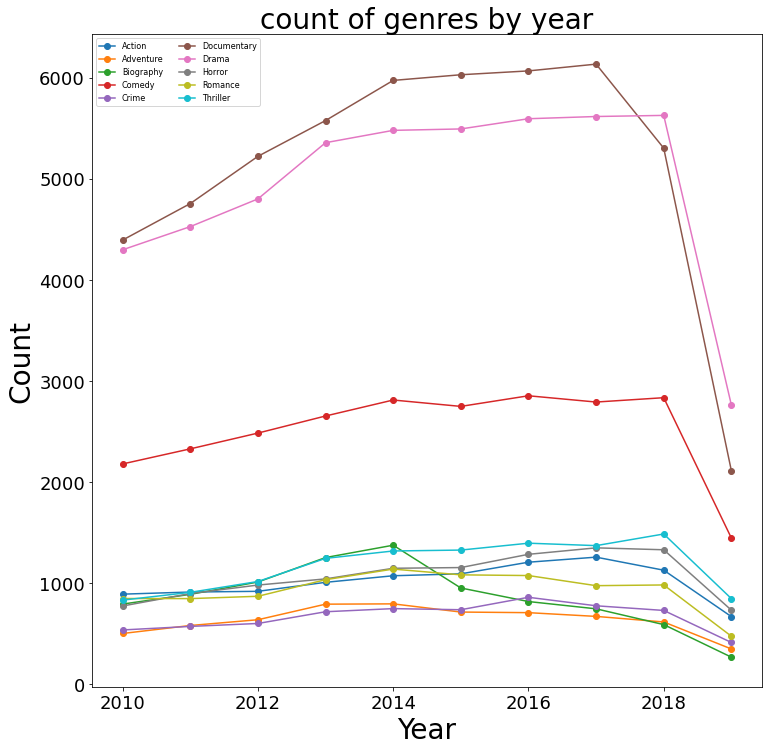

In [78]:
f,ax=plt.subplots(figsize=(12,12))
genres_counts_year_1[0:10].plot(fontsize=14,marker = 'o', ax = ax)
ax.set_xlabel('Year',fontsize=28)
ax.set_ylabel('Count',fontsize=28)
ax.legend(ncol=2,fontsize=8,loc = 0)
ax.tick_params(axis='x',labelsize=18)
ax.tick_params(axis='y',labelsize=18)
ax.set_title('count of genres by year',fontsize=28)
#plt.legend(bbox_to_anchor=(1.0, 1.0),borderaxespad=0,fontsize = 8)# the method that modify legend locations
plt.savefig('4')

## Question 3:  What is top 10 profitable movies over the past 10 years and what is the ROI for each of them? 

In [79]:
df_movie_budget_gross = csv_files_dict['tn_movie_budgets_gz']

In [80]:
df_movie_budget_gross .head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [81]:
def convert_col_to_int(df, col):
    df[col] = df[col].str.replace("$", "").str.replace(",", "").astype('int64')
    return df

In [82]:
df_movie_budget_gross.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [83]:
cols_to_convert = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in cols_to_convert:
    df_movie_budget_gross = convert_col_to_int(df_movie_budget_gross, col)

In [84]:
df_movie_budget_gross.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [85]:
df_movie_budget_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   int64 
 4   worldwide_gross    5782 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 271.0+ KB


In [86]:
df_movie_budget_gross['movie_profit'] = df_movie_budget_gross['worldwide_gross'] - df_movie_budget_gross['production_budget']

In [87]:
df_movie_budget_gross['ROI'] = df_movie_budget_gross['movie_profit']/df_movie_budget_gross['production_budget']

In [88]:
df_movie_budget_gross.sort_values(by = 'movie_profit' , ascending = False).head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_profit,ROI
id,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577
43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,10.041042
7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,5.827114
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,5.710167
34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,6.669092
67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,6.993278
27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897,5.746382
61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,9.733545
42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,5.741291


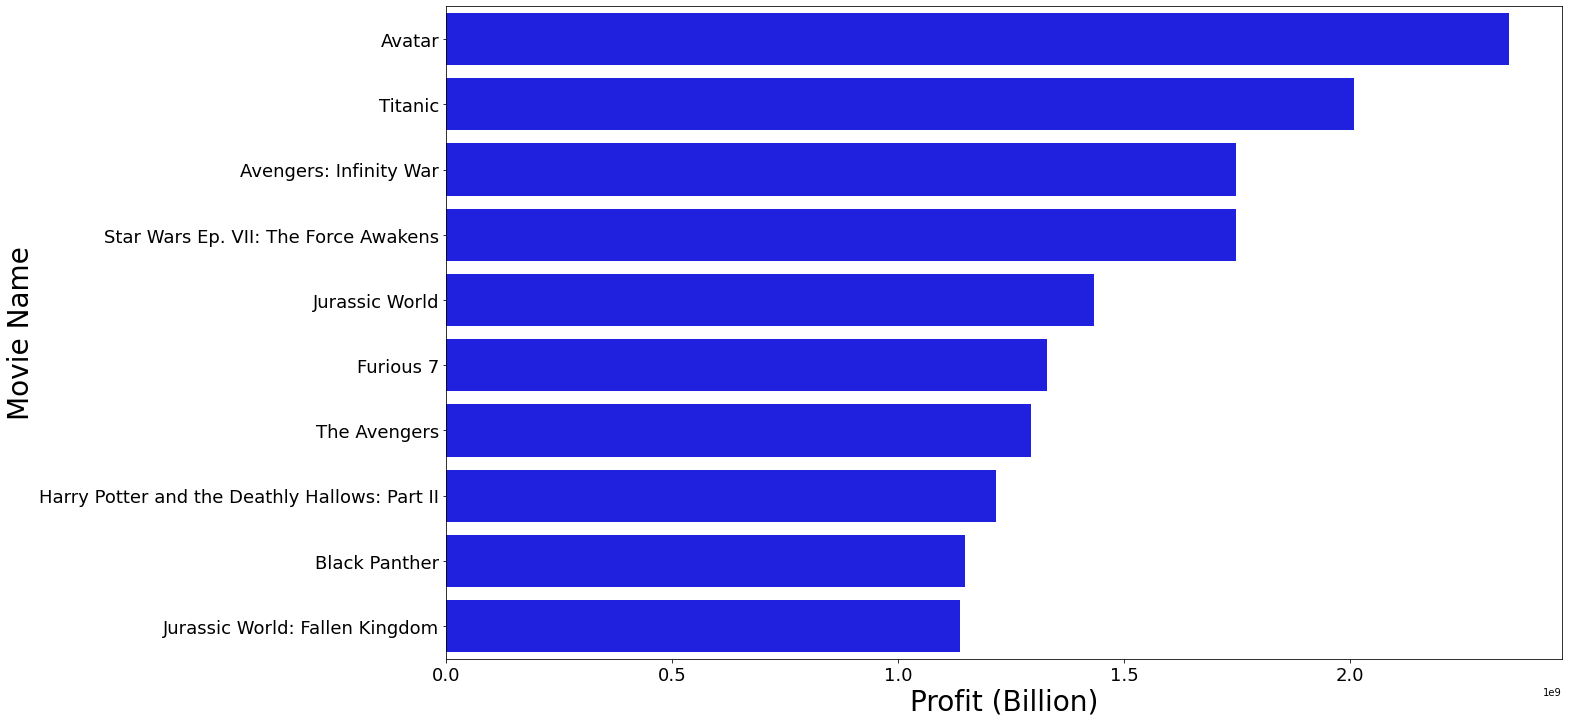

In [89]:
f, ax= plt.subplots(figsize = (20, 12))
sns.barplot(x = 'movie_profit', y = 'movie', data = df_movie_budget_gross.sort_values(by = 'movie_profit',ascending = False)[:10], ax = ax, color = 'Blue')
ax.set_xlabel('Profit (Billion)',fontsize=28)
ax.set_ylabel('Movie Name',fontsize=28)
ax.tick_params(axis='x',labelsize=18)
ax.tick_params(axis='y',labelsize=18)
plt.savefig('5')

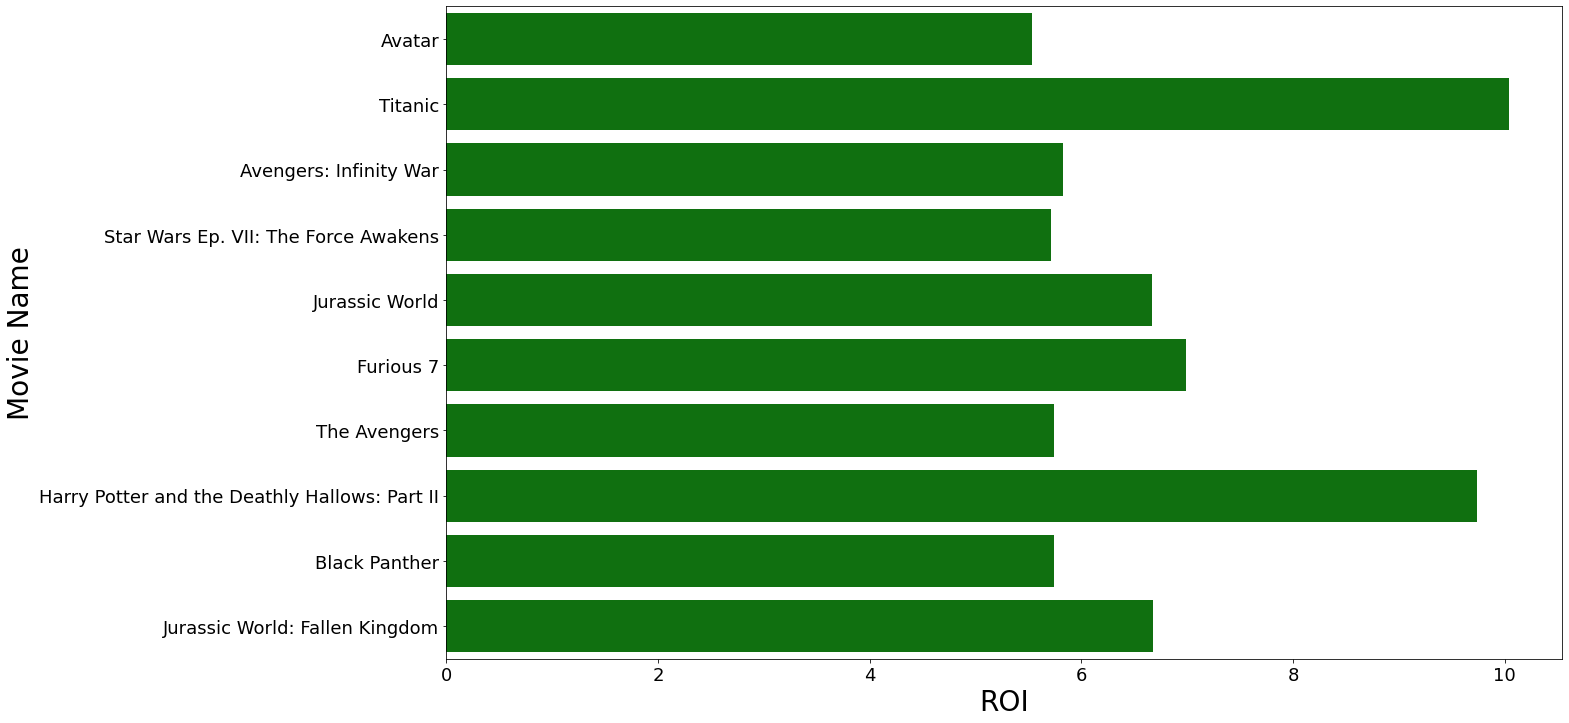

In [90]:
f, ax= plt.subplots(figsize = (20, 12))
sns.barplot(x = 'ROI', y = 'movie', data = df_movie_budget_gross.sort_values(by = 'movie_profit',ascending = False)[:10], ax = ax, color = 'Green')
ax.set_xlabel('ROI',fontsize=28)
ax.set_ylabel('Movie Name',fontsize=28)
ax.tick_params(axis='x',labelsize=18)
ax.tick_params(axis='y',labelsize=18)
plt.savefig('6')

## Which month is the best month for movie realease?

In [91]:
df_movie_budget_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5782 non-null   object 
 1   movie              5782 non-null   object 
 2   production_budget  5782 non-null   int64  
 3   domestic_gross     5782 non-null   int64  
 4   worldwide_gross    5782 non-null   int64  
 5   movie_profit       5782 non-null   int64  
 6   ROI                5782 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 361.4+ KB


In [92]:
df_movie_budget_gross['release_date']

id
1     Dec 18, 2009
2     May 20, 2011
3      Jun 7, 2019
4      May 1, 2015
5     Dec 15, 2017
          ...     
78    Dec 31, 2018
79     Apr 2, 1999
80    Jul 13, 2005
81    Sep 29, 2015
82     Aug 5, 2005
Name: release_date, Length: 5782, dtype: object

In [93]:
df_movie_budget_gross['release_date_1']= pd.to_datetime(df_movie_budget_gross['release_date'])

In [94]:
df_movie_budget_gross.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_profit,ROI,release_date_1
id,,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577,2009-12-18
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673,2011-05-20
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-0.572108,2019-06-07
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841,2015-05-01
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696,2017-12-15


In [95]:
df1 = df_movie_budget_gross.groupby(df_movie_budget_gross['release_date_1'].apply(lambda x: x.month))

In [99]:
df_month_movie_count = df1.count()

In [100]:
df_month_movie_count['month'] = ['Jan.','Feb.','Mar.','Apr.','May','Jun.','Jul.','Aug.','Sep.','Oct.','Nov.','Dec.']

In [101]:
df_month_movie_count

,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_profit,ROI,release_date_1,month
release_date_1,,,,,,,,,
1,347,347,347,347,347,347,347,347,Jan.
2,392,392,392,392,392,392,392,392,Feb.
3,470,470,470,470,470,470,470,470,Mar.
4,454,454,454,454,454,454,454,454,Apr.
5,407,407,407,407,407,407,407,407,May
6,479,479,479,479,479,479,479,479,Jun.
7,440,440,440,440,440,440,440,440,Jul.
8,496,496,496,496,496,496,496,496,Aug.
9,493,493,493,493,493,493,493,493,Sep.


In [103]:
df_month_movie_worldwide_gross = df1.sum()

In [104]:
df_month_movie_worldwide_gross['month'] = ['Jan.','Feb.','Mar.','Apr.','May','Jun.','Jul.','Aug.','Sep.','Oct.','Nov.','Dec.']

In [105]:
df_month_movie_worldwide_gross

,production_budget,domestic_gross,worldwide_gross,movie_profit,ROI,month
release_date_1,,,,,,
1,7232691000,8310517342,16157646936,8924955936,1110.048184,Jan.
2,10994196247,13882543926,28045454121,17051257874,1390.742258,Feb.
3,14467577021,18129303397,37897684431,23430107410,1621.333791,Mar.
4,10806485000,12407092932,27203797390,16397312390,1260.633824,Apr.
5,19184024596,27146065077,66043077615,46859053019,1770.868905,May
6,20644478311,31531570976,68268531657,47624053346,3300.173244,Jun.
7,18720308775,26720337439,62023990453,43303681678,2217.649812,Jul.
8,12675822719,15955429870,30245291880,17569469161,2172.666499,Aug.
9,10753760847,11412894262,23019987786,12266226939,1392.483419,Sep.


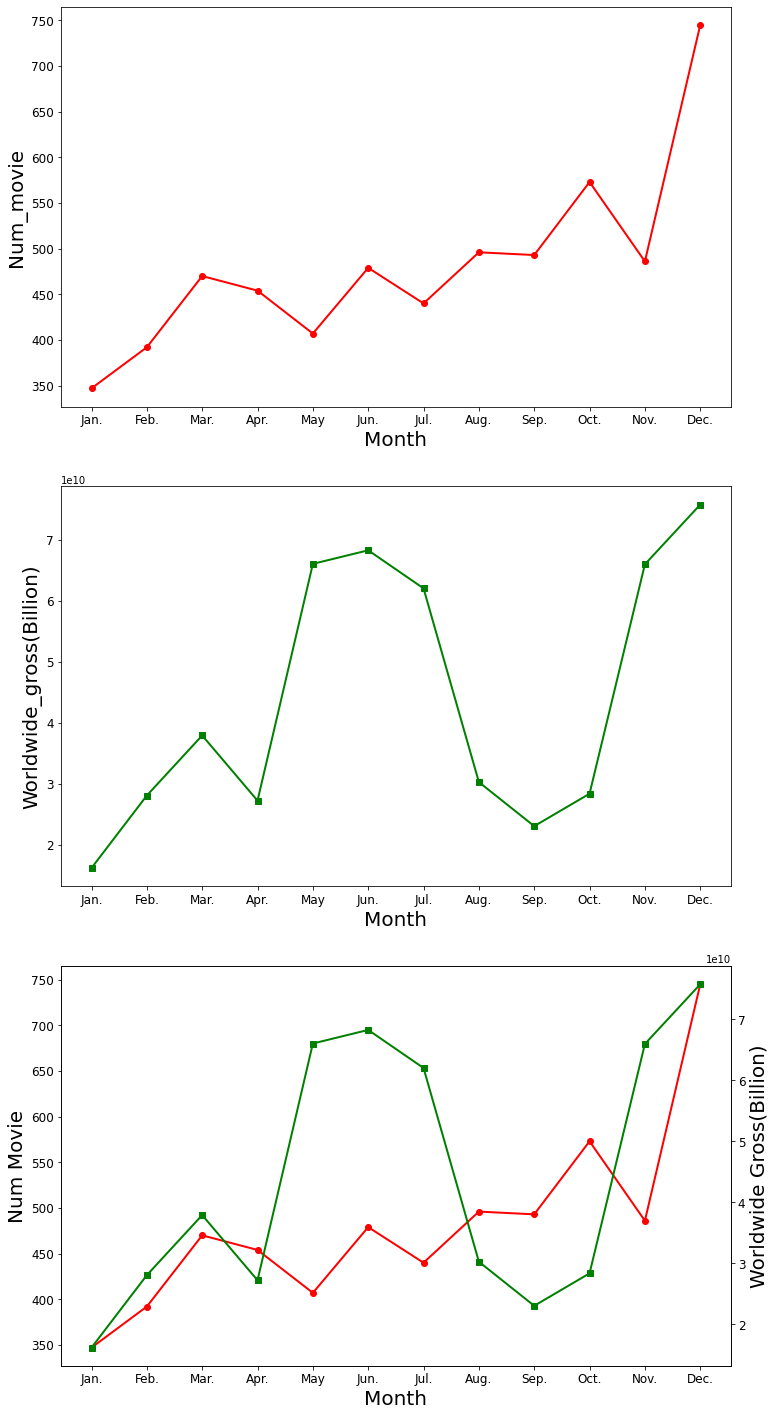

In [137]:
fig = plt.figure(figsize=(12,25))
ax = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
ax4 = ax3.twinx()
ax.plot(df_month_movie_count.month, df_month_movie_count.movie, color = 'red', linewidth = 2, marker = 'o')
ax.set_xlabel('Month',fontsize=20)
ax.set_ylabel('Num_movie',fontsize=20)
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)
ax2.plot(df_month_movie_worldwide_gross.month,df_month_movie_worldwide_gross.worldwide_gross, color = 'green', linewidth = 2, marker = 's')
ax2.set_xlabel('Month',fontsize=20)
ax2.set_ylabel('Worldwide_gross(Billion)',fontsize=20)
ax2.tick_params(axis='x',labelsize=12)
ax2.tick_params(axis='y',labelsize=12)
ax3.plot(df_month_movie_count.month, df_month_movie_count.movie, color = 'red', linewidth = 2, marker = 'o')
ax4.plot(df_month_movie_worldwide_gross.month,df_month_movie_worldwide_gross.worldwide_gross, color = 'green', linewidth = 2, marker = 's')
ax3.set_ylabel('Num Movie', fontsize = 20)
ax4.set_ylabel('Worldwide Gross(Billion)', fontsize = 20)
ax3.set_xlabel('Month',fontsize = 20)
ax3.tick_params(axis='x', labelsize=12)
ax3.tick_params(axis='y',labelsize=12)
ax4.tick_params(axis='y',labelsize=12)
plt.savefig('8')

## Question 4:What is the relationship between top 10 most profitable movies and audience ratings scores?

In [107]:
#pick the top 10 most pofitable movies
df_movie_b_g_positive = df_movie_budget_gross.sort_values(by = 'movie_profit', ascending = False)

In [108]:
df_movie_b_g_positive_1 = df_movie_b_g_positive[0:10]

In [109]:
#data cleaning. drop the columns that I dont need
df_movie_b_g_positive_2 = df_movie_b_g_positive_1.drop(columns = ['release_date','production_budget','domestic_gross','worldwide_gross'])

In [110]:
#reset index
df_movie_b_g_positive_3 = df_movie_b_g_positive_2.reset_index(drop = True)

In [111]:
df_movie_b_g_positive_3

,movie,movie_profit,ROI,release_date_1
0,Avatar,2351345279,5.532577,2009-12-18
1,Titanic,2008208395,10.041042,1997-12-19
2,Avengers: Infinity War,1748134200,5.827114,2018-04-27
3,Star Wars Ep. VII: The Force Awakens,1747311220,5.710167,2015-12-18
4,Jurassic World,1433854864,6.669092,2015-06-12
5,Furious 7,1328722794,6.993278,2015-04-03
6,The Avengers,1292935897,5.746382,2012-05-04
7,Harry Potter and the Deathly Hallows: Part II,1216693157,9.733545,2011-07-15
8,Black Panther,1148258224,5.741291,2018-02-16
9,Jurassic World: Fallen Kingdom,1135772799,6.681016,2018-06-22


In [112]:
df_p_r = csv_files_dict['tmdb_movies_gz']

In [113]:
df_p_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [114]:
df_p_r_1 = df_p_r.drop(columns = ['id','original_language','original_title','release_date'])

In [115]:
df_p_r_1.head()

,genre_ids,popularity,title,vote_average,vote_count
0,"[12, 14, 10751]",33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",28.734,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",28.515,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",28.005,Toy Story,7.9,10174
4,"[28, 878, 12]",27.920,Inception,8.3,22186


In [116]:
df_p_r_2 = df_p_r_1.set_index('title')

In [117]:
df_p_r_2.head()

,genre_ids,popularity,vote_average,vote_count
title,,,,
Harry Potter and the Deathly Hallows: Part 1,"[12, 14, 10751]",33.533,7.7,10788
How to Train Your Dragon,"[14, 12, 16, 10751]",28.734,7.7,7610
Iron Man 2,"[12, 28, 878]",28.515,6.8,12368
Toy Story,"[16, 35, 10751]",28.005,7.9,10174
Inception,"[28, 878, 12]",27.920,8.3,22186


In [118]:
df_movie_b_g_positive_4 = df_movie_b_g_positive_3.set_index('movie')

In [119]:
df_movie_b_g_positive_4

,movie_profit,ROI,release_date_1
movie,,,
Avatar,2351345279,5.532577,2009-12-18
Titanic,2008208395,10.041042,1997-12-19
Avengers: Infinity War,1748134200,5.827114,2018-04-27
Star Wars Ep. VII: The Force Awakens,1747311220,5.710167,2015-12-18
Jurassic World,1433854864,6.669092,2015-06-12
Furious 7,1328722794,6.993278,2015-04-03
The Avengers,1292935897,5.746382,2012-05-04
Harry Potter and the Deathly Hallows: Part II,1216693157,9.733545,2011-07-15
Black Panther,1148258224,5.741291,2018-02-16


In [120]:
#right join two dataframes 
df_p_r_3 = df_p_r_2.join(df_movie_b_g_positive_4,how = 'right')

In [121]:
df_p_r_4 = df_p_r_3.sort_values(by = 'movie_profit' , ascending = False)

In [122]:
df_p_r_5 = df_p_r_4.drop(columns = ['vote_count'])

In [123]:
df_p_r_5

,genre_ids,popularity,vote_average,movie_profit,ROI,release_date_1
Avatar,"[28, 12, 14, 878]",26.526,7.4,2351345279,5.532577,2009-12-18
Titanic,NaN,NaN,NaN,2008208395,10.041042,1997-12-19
Avengers: Infinity War,"[12, 28, 14]",80.773,8.3,1748134200,5.827114,2018-04-27
Star Wars Ep. VII: The Force Awakens,NaN,NaN,NaN,1747311220,5.710167,2015-12-18
Jurassic World,"[28, 12, 878, 53]",20.709,6.6,1433854864,6.669092,2015-06-12
Furious 7,"[28, 80, 53]",20.396,7.3,1328722794,6.993278,2015-04-03
The Avengers,"[878, 28, 12]",50.289,7.6,1292935897,5.746382,2012-05-04
Harry Potter and the Deathly Hallows: Part II,NaN,NaN,NaN,1216693157,9.733545,2011-07-15
Black Panther,"[28, 16]",2.058,5.1,1148258224,5.741291,2018-02-16
Black Panther,"[28, 12, 14, 878]",44.140,7.4,1148258224,5.741291,2018-02-16


In [124]:
df_p_r_5.index = ['Avatar', 'Titanic', 'Avengers: Infinity War',
       'Star Wars Ep. VII: The Force Awakens', 'Jurassic World', 'Furious 7',
       'The Avengers', 'Harry Potter and the Deathly Hallows: Part II',
       'Black Panther DEL', 'Black Panther', 'Jurassic World: Fallen Kingdom']

In [125]:
df_p_r_5

,genre_ids,popularity,vote_average,movie_profit,ROI,release_date_1
Avatar,"[28, 12, 14, 878]",26.526,7.4,2351345279,5.532577,2009-12-18
Titanic,NaN,NaN,NaN,2008208395,10.041042,1997-12-19
Avengers: Infinity War,"[12, 28, 14]",80.773,8.3,1748134200,5.827114,2018-04-27
Star Wars Ep. VII: The Force Awakens,NaN,NaN,NaN,1747311220,5.710167,2015-12-18
Jurassic World,"[28, 12, 878, 53]",20.709,6.6,1433854864,6.669092,2015-06-12
Furious 7,"[28, 80, 53]",20.396,7.3,1328722794,6.993278,2015-04-03
The Avengers,"[878, 28, 12]",50.289,7.6,1292935897,5.746382,2012-05-04
Harry Potter and the Deathly Hallows: Part II,NaN,NaN,NaN,1216693157,9.733545,2011-07-15
Black Panther DEL,"[28, 16]",2.058,5.1,1148258224,5.741291,2018-02-16
Black Panther,"[28, 12, 14, 878]",44.140,7.4,1148258224,5.741291,2018-02-16


In [126]:
df_p_r_5.drop(columns = 'popularity')

,genre_ids,vote_average,movie_profit,ROI,release_date_1
Avatar,"[28, 12, 14, 878]",7.4,2351345279,5.532577,2009-12-18
Titanic,NaN,NaN,2008208395,10.041042,1997-12-19
Avengers: Infinity War,"[12, 28, 14]",8.3,1748134200,5.827114,2018-04-27
Star Wars Ep. VII: The Force Awakens,NaN,NaN,1747311220,5.710167,2015-12-18
Jurassic World,"[28, 12, 878, 53]",6.6,1433854864,6.669092,2015-06-12
Furious 7,"[28, 80, 53]",7.3,1328722794,6.993278,2015-04-03
The Avengers,"[878, 28, 12]",7.6,1292935897,5.746382,2012-05-04
Harry Potter and the Deathly Hallows: Part II,NaN,NaN,1216693157,9.733545,2011-07-15
Black Panther DEL,"[28, 16]",5.1,1148258224,5.741291,2018-02-16
Black Panther,"[28, 12, 14, 878]",7.4,1148258224,5.741291,2018-02-16


In [127]:
df_p_r_6 = df_p_r_5.drop(index = 'Black Panther DEL')

In [128]:
df_p_r_6.vote_average[1] = 7.8

<ipython-input-128-c4ad8b63e149>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p_r_6.vote_average[1] = 7.8


In [129]:
df_p_r_6.vote_average[3] = 7.9

<ipython-input-129-0c5e22a5a99c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p_r_6.vote_average[3] = 7.9


In [130]:
df_p_r_6.vote_average[7] = 8.1

<ipython-input-130-b7bafee69be5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p_r_6.vote_average[7] = 8.1


In [133]:
df_p_r_6

,genre_ids,popularity,vote_average,movie_profit,ROI,release_date_1
Avatar,"[28, 12, 14, 878]",26.526,7.4,2351345279,5.532577,2009-12-18
Titanic,NaN,NaN,7.8,2008208395,10.041042,1997-12-19
Avengers: Infinity War,"[12, 28, 14]",80.773,8.3,1748134200,5.827114,2018-04-27
Star Wars Ep. VII: The Force Awakens,NaN,NaN,7.9,1747311220,5.710167,2015-12-18
Jurassic World,"[28, 12, 878, 53]",20.709,6.6,1433854864,6.669092,2015-06-12
Furious 7,"[28, 80, 53]",20.396,7.3,1328722794,6.993278,2015-04-03
The Avengers,"[878, 28, 12]",50.289,7.6,1292935897,5.746382,2012-05-04
Harry Potter and the Deathly Hallows: Part II,NaN,NaN,8.1,1216693157,9.733545,2011-07-15
Black Panther,"[28, 12, 14, 878]",44.140,7.4,1148258224,5.741291,2018-02-16
Jurassic World: Fallen Kingdom,"[28, 12, 878]",34.958,6.5,1135772799,6.681016,2018-06-22


In [134]:
df_p_r_7 = df_p_r_6.drop(columns = ['popularity','genre_ids'])

In [135]:
df_p_r_7

,vote_average,movie_profit,ROI,release_date_1
Avatar,7.4,2351345279,5.532577,2009-12-18
Titanic,7.8,2008208395,10.041042,1997-12-19
Avengers: Infinity War,8.3,1748134200,5.827114,2018-04-27
Star Wars Ep. VII: The Force Awakens,7.9,1747311220,5.710167,2015-12-18
Jurassic World,6.6,1433854864,6.669092,2015-06-12
Furious 7,7.3,1328722794,6.993278,2015-04-03
The Avengers,7.6,1292935897,5.746382,2012-05-04
Harry Potter and the Deathly Hallows: Part II,8.1,1216693157,9.733545,2011-07-15
Black Panther,7.4,1148258224,5.741291,2018-02-16
Jurassic World: Fallen Kingdom,6.5,1135772799,6.681016,2018-06-22


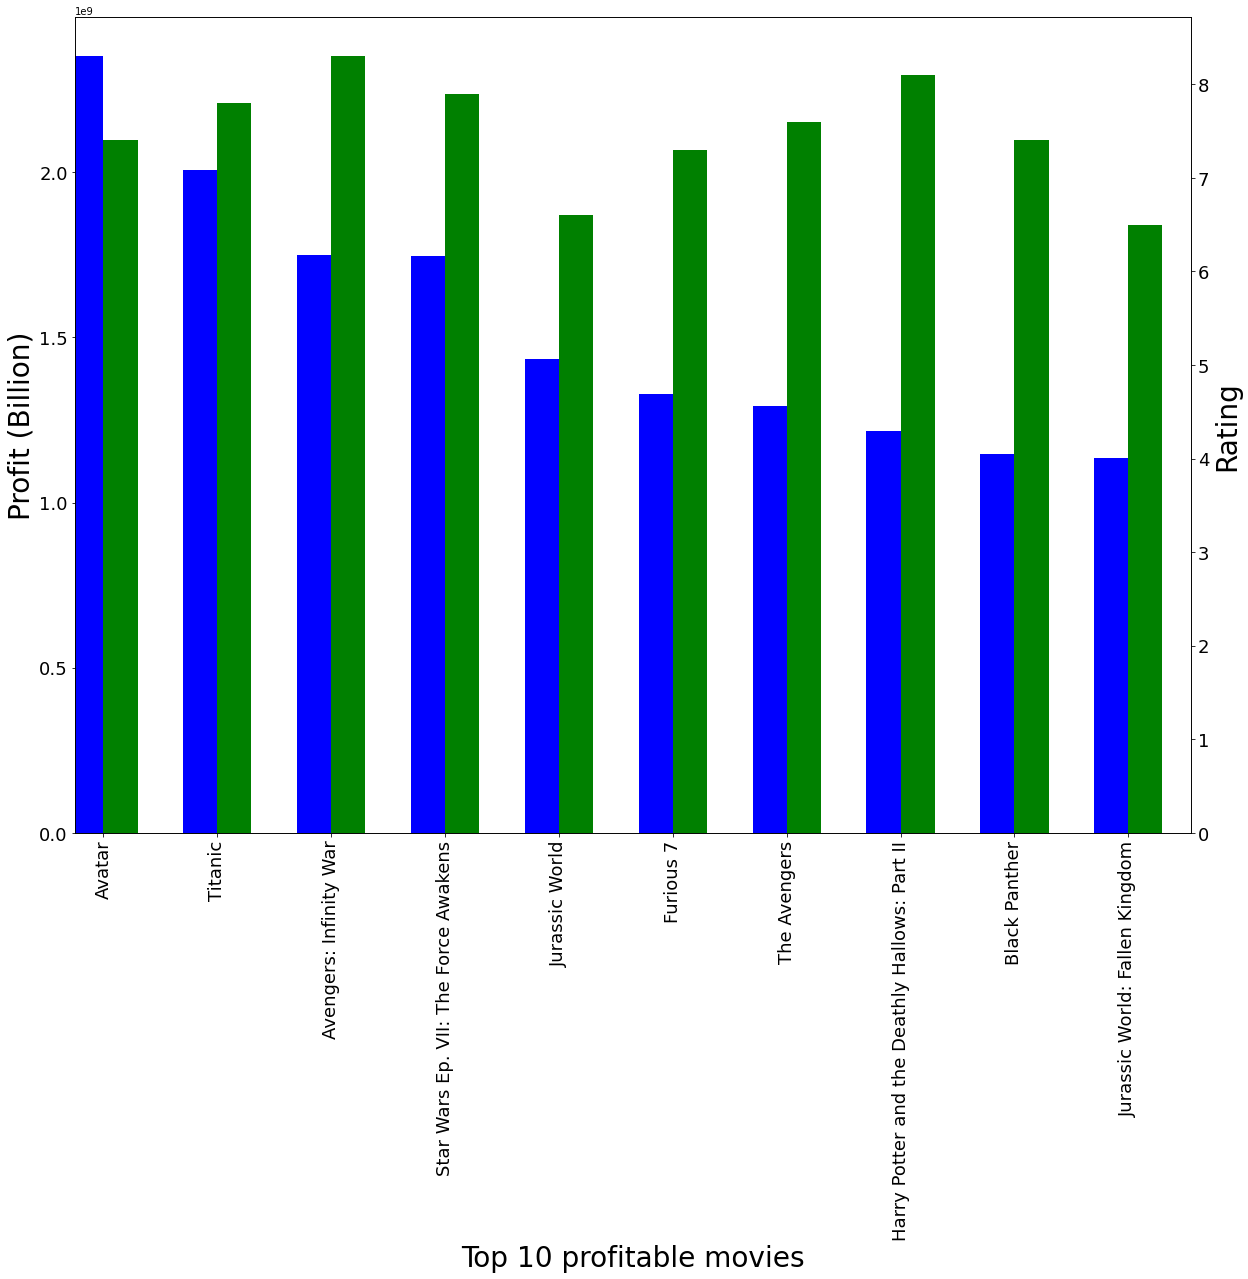

In [132]:
f,ax=plt.subplots(figsize=(20,15))
ax2 = ax.twinx()
width = 0.3
df_p_r_7.movie_profit.plot(kind='bar', color='blue', ax=ax, width=width, position=1)
df_p_r_7.vote_average.plot(kind='bar', color='green', ax=ax2, width=width, position=0)
ax.set_ylabel('Profit (Billion)', fontsize = 28)
ax2.set_ylabel('Rating', fontsize = 28)
ax.set_xlabel('Top 10 profitable movies',fontsize = 28)
ax.tick_params(axis='x',labelsize=18)
ax.tick_params(axis='y',labelsize=18)
ax2.tick_params(axis='y',labelsize=18)
plt.savefig('7')